# EDA

We're working with shot data across two decades of NBA games. Let's load it into a dataframe.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def quarter_to_int(quarter):
    return int(quarter[0])

def time_remaining_to_seconds(time_remaining):
    minutes, seconds = time_remaining.split(":")
    return float(minutes) * 60 + float(seconds)

def total_time_remaining(quarter, time):
    return (4 - quarter) * 12 * 60 + time

# Load the data

df = pd.DataFrame()

for file in os.listdir("../data_by_season"):
    if file.endswith(".csv"):
        df = pd.concat([df, pd.read_csv("../data_by_season/" + file)])

# Make quarter an integer
df["quarter"] = df["quarter"].apply(quarter_to_int)

# Make time_remaining a float
df["time_remaining"] = df["time_remaining"].apply(time_remaining_to_seconds)

# Create a total_time_remaining column representing time left in the game (not just the quarter)
df["total_time_remaining"] = df.apply(lambda x: total_time_remaining(x["quarter"], x["time_remaining"]), axis=1)

# Create two columns for shooting team score and opposing team score
df["shooting_team_score"] = df["score"].apply(lambda x: int(x.split("-")[0]))
df["opposing_team_score"] = df["score"].apply(lambda x: int(x.split("-")[1]))

# Create a column for score difference: shooting team score - opposing team score
df["score_difference"] = df["shooting_team_score"] - df["opposing_team_score"]

# Create a points column for number of points scored on the play if made
df["points"] = df["shot_type"].apply(lambda x: int(x.split("-")[0]))

# Sort the data by match_id and total_time_remaining (will put them in chronological order)
df = df.sort_values(["match_id", "total_time_remaining"], ascending=[True, False])

print(df.dtypes)
df.head()

match_id                 object
shotX                   float64
shotY                   float64
quarter                   int64
time_remaining          float64
player                   object
team                     object
made                       bool
shot_type                object
distance                  int64
score                    object
opp                      object
status                   object
year                      int64
total_time_remaining    float64
shooting_team_score       int64
opposing_team_score       int64
score_difference          int64
points                    int64
dtype: object


,match_id,shotX,shotY,quarter,time_remaining,player,team,made,shot_type,distance,score,opp,status,year,total_time_remaining,shooting_team_score,opposing_team_score,score_difference,points
62,200010310ATL,31.7,6.5,1,707.0,Jim Jackson,ATL,False,2-pointer,8,0-0,'CHH',tied,2001,2867.0,0,0,0,2
63,200010310ATL,24.0,5.0,1,706.0,Hanno Möttölä,ATL,True,2-pointer,0,2-0,'CHH',leads,2001,2866.0,2,0,2,2
0,200010310ATL,8.3,20.2,1,689.0,Baron Davis,CHH,False,2-pointer,22,0-2,'CHH',trails,2001,2849.0,0,2,-2,2
64,200010310ATL,14.6,8.0,1,670.0,Alan Henderson,ATL,False,2-pointer,10,2-0,'CHH',leads,2001,2830.0,2,0,2,2
1,200010310ATL,35.9,15.8,1,641.0,Jamal Mashburn,CHH,False,2-pointer,16,0-2,'CHH',trails,2001,2801.0,0,2,-2,2


Before we continue, it's important to note that the net has a `shotX` value of 25 feet and a `shotY` value of 0 feet.

Our first question is: how has the location of shot attempts changed over the years? Let's make a scatterplot of shots colored by season.

<Axes: xlabel='shotX', ylabel='shotY'>

/home/shreyas/Code/UVA/DSML/project/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/shreyas/Code/UVA/DSML/project/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


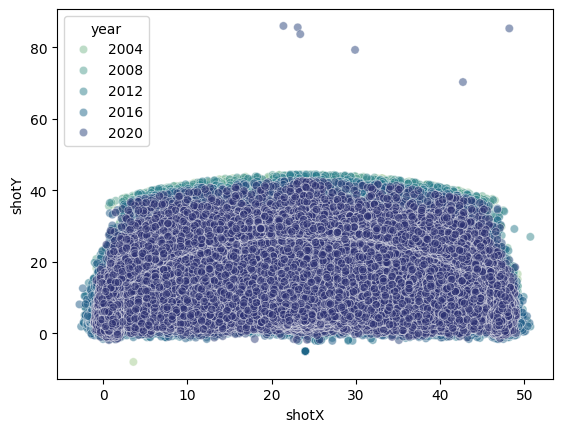

In [ ]:
sns.scatterplot(x="shotX", y="shotY", data=df, hue="year", alpha=0.5, palette="crest")

<!-- TODO: complete analysis -->

What about whether a shot was successful or not? Are closer shots more successful?

<Axes: xlabel='shotX', ylabel='shotY'>

/home/shreyas/Code/UVA/DSML/project/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/shreyas/Code/UVA/DSML/project/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


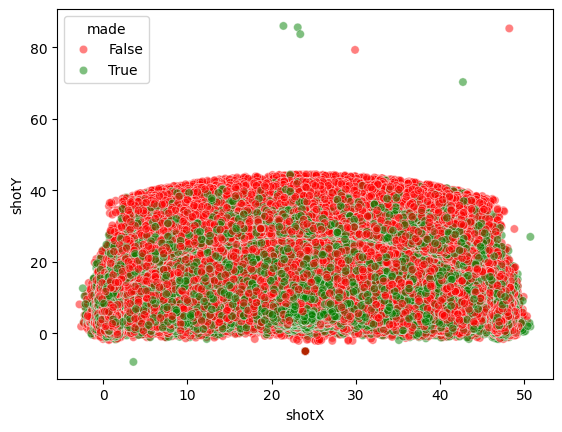

In [ ]:
sns.scatterplot(x="shotX", y="shotY", data=df, hue="made", palette=["red", "green"], alpha=0.5)

<!-- TODO: complete analysis -->

Is there a tendency for players to shoot closer or farther from the net as the game nears the end? Let's vary the colors by total_time_remaining.

<Axes: xlabel='shotX', ylabel='shotY'>

/home/shreyas/Code/UVA/DSML/project/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/shreyas/Code/UVA/DSML/project/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


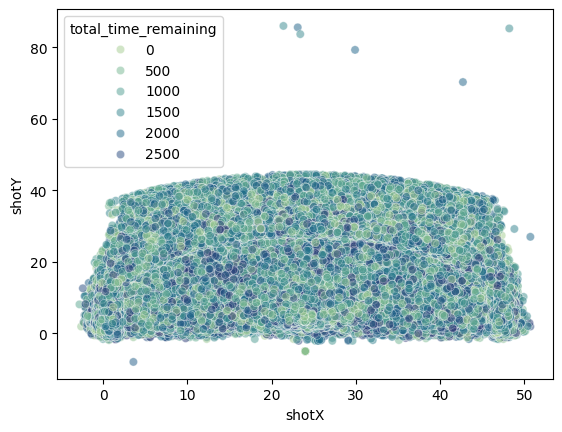

In [ ]:
sns.scatterplot(x="shotX", y="shotY", data=df, hue="total_time_remaining", alpha=0.5, palette="crest")

<!-- TODO: complete analysis -->

We can do more with this dataset than just plotting spatial visualizations, though. How does shooting frequency vary with time remaining in the game?

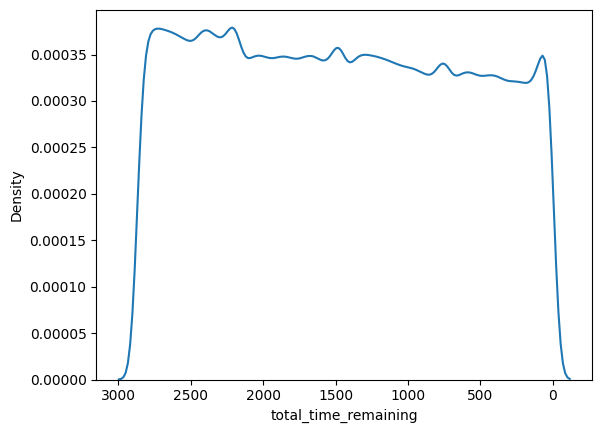

In [12]:
sns.kdeplot(df, x="total_time_remaining")
plt.gca().invert_xaxis()

<!-- TODO: complete analysis -->

What about shot attempts over the years? How has that number changed?

<Axes: xlabel='year', ylabel='average_shots_per_game'>

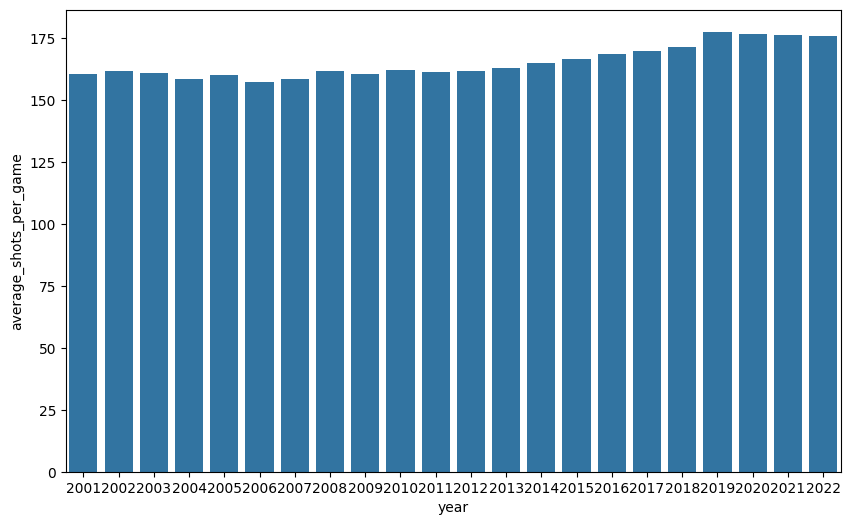

In [15]:
result = df.groupby("year")["match_id"].count() / df.groupby("year")["match_id"].nunique()
result = result.reset_index(name="average_shots_per_game")
plt.figure(figsize=(10, 6))
sns.barplot(x="year", y="average_shots_per_game", data=result)


<!-- TODO: complete analysis -->

Do players shoot more 3-pointers when their team is down by a lot, or do they play it safe and try for lots of 2-pointers? For the sake of avoiding outliers, let's look at games where the score difference is no more than 20 points.

<Axes: xlabel='score_difference', ylabel='Density'>

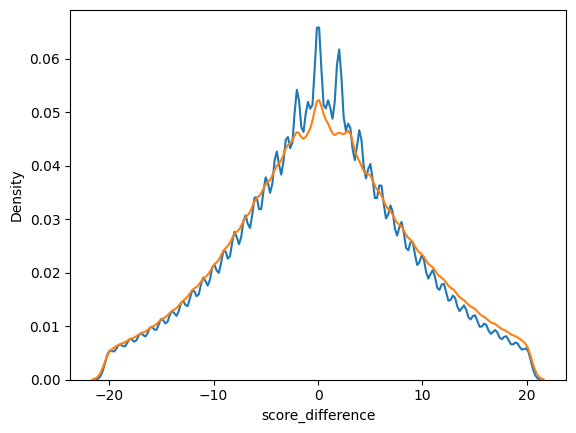

In [24]:
df2 = df[abs(df["score_difference"]) <= 20]
sns.kdeplot(df2[df2["points"] == 2], x="score_difference", label="2-pointers")
sns.kdeplot(df2[df2["points"] == 3], x="score_difference", label="3-pointers")

<!-- TODO: complete analysis -->